### **Import Libraries**

In [ ]:
pip install keras


In [ ]:
pip install tensorflow

In [ ]:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers

In [ ]:
df= pd.read_csv('/content/xjtlu-mcm-2024-problem-c-data.csv')

In [ ]:
# 注意要把时间改成numerical data否则无法拟合
df.head()

In [ ]:
df.shape

In [128]:
#count number of null(empty) values
df.isna().sum()

Date                            0
Exchange Rate of JPY to USD    55
Exchange Rate of GBP to USD    55
dtype: int64

In [129]:
# Drop the column with null values
df.dropna(inplace=True)

In [130]:
# count of rows and columns
df.shape

(1253, 3)

In [131]:
#count number of null(empty) values
df.isna().sum()

Date                           0
Exchange Rate of JPY to USD    0
Exchange Rate of GBP to USD    0
dtype: int64

In [132]:
df

,Date,Exchange Rate of JPY to USD,Exchange Rate of GBP to USD
1,20140102,104.84,0.6082
2,20140103,104.46,0.6089
3,20140106,104.38,0.6093
4,20140107,104.54,0.6090
5,20140108,104.87,0.6075
...,...,...,...
1302,20181228,110.34,0.7875
1303,20181231,109.70,0.7835
1305,20190102,109.22,0.7938
1306,20190103,108.07,0.7916


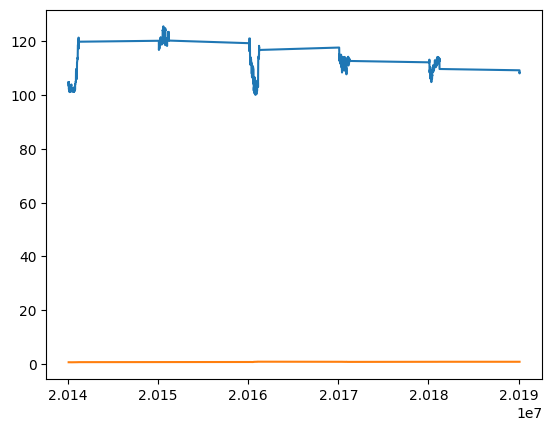

In [133]:
# plot the data

x=df['Date']
y_JPY=df['Exchange Rate of JPY to USD']
y_GBP=df['Exchange Rate of GBP to USD']
plt.plot(x,y_JPY)
plt.plot(x,y_GBP)
plt.show()

### Split Dataset & Feature Scaling

In [134]:
#Splitting the dataset into independent and dependent datasets
X=df.iloc[:,0].values #date
Y_JPY=df.iloc[:,1].values #JPY
Y_GBP=df.iloc[:,2].values #GBP

In [135]:
#Splitting datasets into training(75%) and testing(25%)
X_train=df.iloc[0:939,0]
Y_JPYtrain=df.iloc[0:939,1]
Y_GBPtrain=df.iloc[0:939,2]
X_test=df.iloc[940:1252,0]
Y_JPYtest=df.iloc[940:1252,1]
Y_GBPtest=df.iloc[940:1252,2]

In [ ]:
# no need for feature scaling


In [145]:
# 创建模型
inputs = X_train
targets_JPY = Y_JPYtrain
targets_GBP = Y_GBPtrain

In [137]:
model_JPY = Sequential()
model_JPY.add(Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.1)))#添加L2正则化，防止过拟合
model_JPY.add(Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.1)))
model_JPY.add(Dense(1, activation='linear'))

In [138]:
# compile the first model
model_JPY.compile(loss='mean_squared_error', optimizer='adam')

In [139]:
# train the JPY model
model_JPY.fit(inputs, targets, epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 1655352066048.0000
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 18921793536.0000
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 1978933760.0000
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 113139384.0000
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 5076589.5000
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 199951.5469
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 6313.6104
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 252.9692
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 68.1783
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 55.7168
Epoch 11/100
30/30 [==============================] - 0s 3ms/step - loss: 55.2169
Epoch 12/100
30/30 [==============================] - 0s 2ms

In [140]:
y_pred_JPY = model_JPY.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [141]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_JPYtest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_JPYtest, y_pred)
r2 = r2_score(Y_JPYtest, y_pred)


print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R-squared: {r2:.3f}")

MSE: 5.757
RMSE: 2.399
MAE: 1.887
R-squared: -0.070


通过调整正则化系数到0.1让评估数据从MSE: 6.103
RMSE: 2.470
MAE: 1.906
R-squared: -0.134
提升到
MSE: 5.757
RMSE: 2.399
MAE: 1.887
R-squared: -0.070

In [142]:
model_GBP = Sequential()
model_GBP.add(Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.1)))#添加L2正则化，防止过拟合
model_GBP.add(Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.1)))
model_GBP.add(Dense(1, activation='linear'))

In [143]:
# compile the second model
model_GBP.compile(loss='mean_squared_error', optimizer='adam')

In [146]:
# train the JPY model
model_GBP.fit(inputs, targets_GBP, epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 12619194826752.0000
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 3920474931200.0000
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 1300742012928.0000
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 437310455808.0000
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 117973966848.0000
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 23535276032.0000
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 3223911424.0000
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 284216672.0000
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 14339392.0000
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 286188.3438
Epoch 11/100
30/30 [==============================] - 0s 2ms/step - loss: 1011.4601
Epoch 12/100
30/3

In [147]:
y_pred_GBP = model_GBP.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [148]:
mse = mean_squared_error(Y_GBPtest, y_pred_GBP)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_GBPtest, y_pred_GBP)
r2 = r2_score(Y_GBPtest, y_pred_GBP)


print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R-squared: {r2:.3f}")

MSE: 0.012
RMSE: 0.109
MAE: 0.090
R-squared: -18.573
